# La régression logistique from scratch

Comme vous le savez, je pense intimement que la meilleure façon de bien comprendre un algorithme, c'est de le recoder from scratch.

Dans ce notebook, on va coder from scratch l'algorithme de la régression logistique

# Importation des packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

# Importation des données

In [ ]:
data = load_breast_cancer()

# Préparation des données

## Séparation des données explicatives et de la variable cible

In [ ]:
x = data.data
y = data.target.reshape(data.target.shape[0], 1)

## Standardisation des données

In [ ]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_norm = (x - x_mean) / x_std

# Implémentation de la classe *logistic_regression*

## Initialisation de la classe

Dans cette classe on va initialiser les poids nécessaires à la prédiction de notre modèle.

In [ ]:
class logistic_regression():
  def __init__(self, x, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

Test de la classe

In [ ]:
log_reg = logistic_regression(x)
print(log_reg._w.shape)
log_reg._w

(31, 1)


array([[0.69646919],
       [0.28613933],
       [0.22685145],
       [0.55131477],
       [0.71946897],
       [0.42310646],
       [0.9807642 ],
       [0.68482974],
       [0.4809319 ],
       [0.39211752],
       [0.34317802],
       [0.72904971],
       [0.43857224],
       [0.0596779 ],
       [0.39804426],
       [0.73799541],
       [0.18249173],
       [0.17545176],
       [0.53155137],
       [0.53182759],
       [0.63440096],
       [0.84943179],
       [0.72445532],
       [0.61102351],
       [0.72244338],
       [0.32295891],
       [0.36178866],
       [0.22826323],
       [0.29371405],
       [0.63097612],
       [0.09210494]])

## Implémentation de la classe *sigmoid*

On va implémenter la fonction sigmoid :

$$ g(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
class logistic_regression():
  def __init__(self, x, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

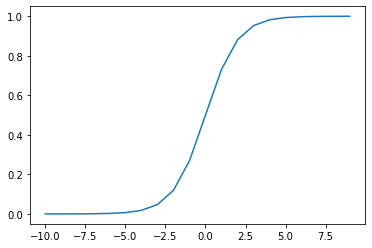

In [ ]:
log_reg = logistic_regression(x)

x_1 = np.arange(-10, 10)
y_1 = log_reg.sigmoid(x_1)
plt.plot(x_1, y_1)
plt.show()

## Implémentation de la classe *predict*

L'objectif de cette partie est d'implémenter une fonction *predict* qui prendra en entrée un jeu de données afin d'effectuer une prediction pour chacun des exemples.

Pour effectuer la prédiction la fonction *predict* utilise la formule suivante :

$$pred(X) = \sigma(X.W) = \hat y$$

In [ ]:
class logistic_regression():
  def __init__(self, x, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    mul = np.dot(x_1, self._w)
    return self.sigmoid(mul)

In [ ]:
log_reg = logistic_regression(x)
print(log_reg.predict(x).shape)
log_reg.predict(x_norm)

(569, 1)


array([[1.00000000e+00],
       [9.95048052e-01],
       [9.99999280e-01],
       [1.00000000e+00],
       [9.99948160e-01],
       [9.98526478e-01],
       [9.91829936e-01],
       [9.99028070e-01],
       [9.99837141e-01],
       [9.99999865e-01],
       [1.95615214e-01],
       [9.98404038e-01],
       [1.00000000e+00],
       [9.20181458e-01],
       [9.99981802e-01],
       [9.99968973e-01],
       [6.78645786e-01],
       [9.99994546e-01],
       [9.99989687e-01],
       [5.34422013e-02],
       [2.01357150e-02],
       [3.53213661e-04],
       [9.99994962e-01],
       [9.99979359e-01],
       [9.99997151e-01],
       [9.99999994e-01],
       [9.99744028e-01],
       [9.99890589e-01],
       [9.99963207e-01],
       [9.69100023e-01],
       [9.99999855e-01],
       [9.99574907e-01],
       [9.99996570e-01],
       [9.99992585e-01],
       [9.98971433e-01],
       [9.99619254e-01],
       [9.54511268e-01],
       [2.90249477e-04],
       [7.20505411e-02],
       [5.63669402e-01],


# Implémentation de la fonction *compute_cost*

Dans cette fonction nous allons implémenter la fonction de coût de notre fonction pour estimer l'erreur de prédiction de notre modèle.

Pour cela, nous allons utiliser l'erreur moyenne au carré ou MSE.

$$ J(W)= -\frac{1}{m}\sum^{N}_{i=1}y_i \log{(\hat y^{(i)})}+(1-y_i)\log{(1-\hat y^{(i)})}$$

In [ ]:
class logistic_regression():
  def __init__(self, x, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return self.sigmoid(np.dot(x_1, self._w))

  def compute_cost(self, y, y_hat):
    m, _ = y.shape
    return 1/(2*m) * np.dot((y-y_hat).T, (y-y_hat))

In [ ]:
log_reg = logistic_regression(x)
y_pred = log_reg.predict(x)
log_reg.compute_cost(y, y_pred)

array([[0.18629174]])

# Implémentation de la fonction *fit*

Dans cette fonction, nous allons implémenter la fonction du gradient descent.

L'objectif est de trouver les valeurs des paramètres qui minimisent le plus la fonction de coût implémentée précédemment.

Expression mathématique :
$$ w_j := w_j  - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat y^{(i)}-y^{(i)})x_j^{(i)}$$

Expression vectorielle :
$$ W := W - \frac{\alpha}{m}X^T (\hat Y-Y) $$

In [ ]:
class logistic_regression():
  def __init__(self, x, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return self.sigmoid(np.dot(x_1, self._w))

  def compute_cost(self, y, y_hat):
    m, _ = y.shape
    return 1/(2*m) * np.dot((y-y_hat).T, (y-y_hat))

  def fit(self, x, y, learning_rate=0.001, num_iters=200):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):

      self._w = self._w - (learning_rate/m) * np.dot(x_1.T, (self.predict(x)-y))

      J_history[i] = self.compute_cost(self.predict(x), y)

    return J_history

In [ ]:
log_reg = logistic_regression(x_norm)
history = log_reg.fit(x_norm, y, learning_rate=0.01, num_iters=500)

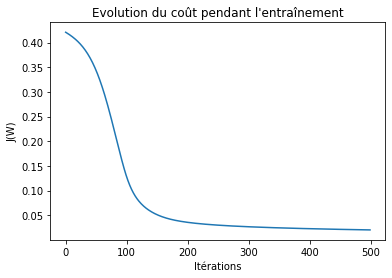

In [ ]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

# Influence du learning rate

In [ ]:
iterations=2500
learning_rate = [0.1, 0.01, 0.001]
J_history = np.zeros((iterations, len(learning_rate)))

for i in range(0, len(learning_rate)) :
  log_reg = logistic_regression(x_norm)
  J_history[:, i] = log_reg.fit(x_norm, y, learning_rate[i], num_iters=iterations)

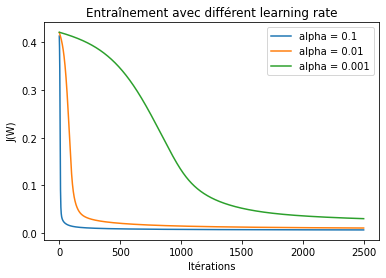

In [ ]:
fig, ax = plt.subplots()

plt.plot(J_history[:, 0], label="alpha = 0.1")
plt.plot(J_history[:, 1], label="alpha = 0.01")
plt.plot(J_history[:, 2], label="alpha = 0.001")

plt.title('Entraînement avec différent learning rate')
plt.xlabel("Itérations")
plt.ylabel("J(W)")
ax.legend(loc='upper right')
plt.show()